In [1]:
import pandas as pd

In [11]:
df = pd.read_csv('train.csv')

In [12]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Определяем отсутствующие значения в столбцах

In [13]:
missing_values = df.isnull().sum()
missing_values

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Заполняем отсутсвующие значения модой

In [18]:
df.fillna(df.mode().iloc[0], inplace=True)

In [20]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

Проверяем дубликаты

In [23]:
duplicates = df.duplicated()
duplicates


0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [24]:
if duplicates.any():
    # Удалить дублирующиеся строки
    df.drop_duplicates(inplace=True)
    print("Дублирующиеся строки успешно удалены.")
else:
    print("В датасете нет дублирующихся строк.")

В датасете нет дублирующихся строк.


Проверяем тип данных

In [27]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

В принципе все данные в порядке

А:Распределение целевой переменной 'SalePrice' и наличие выбросов:

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

Построим гистограмму распределения цен на недвижимость

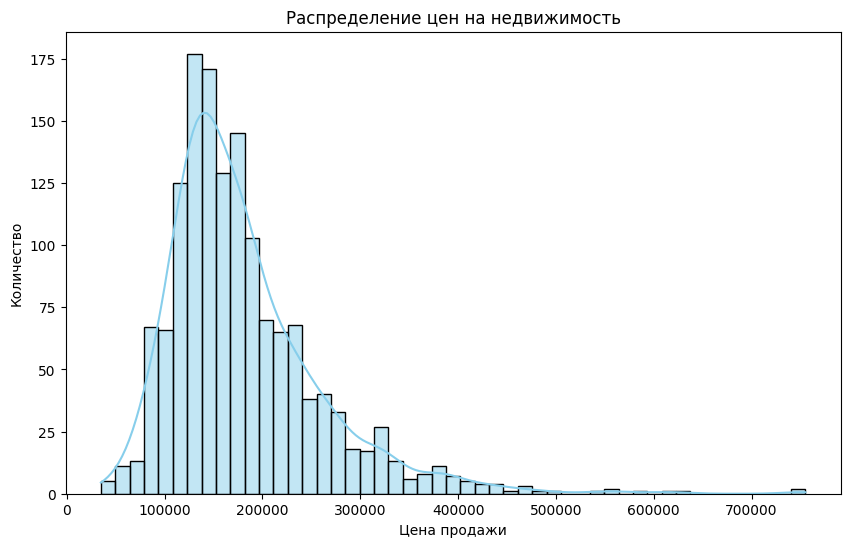

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, color='skyblue')
plt.title('Распределение цен на недвижимость')
plt.xlabel('Цена продажи')
plt.ylabel('Количество')
plt.show()

Проверим наличие выбросов

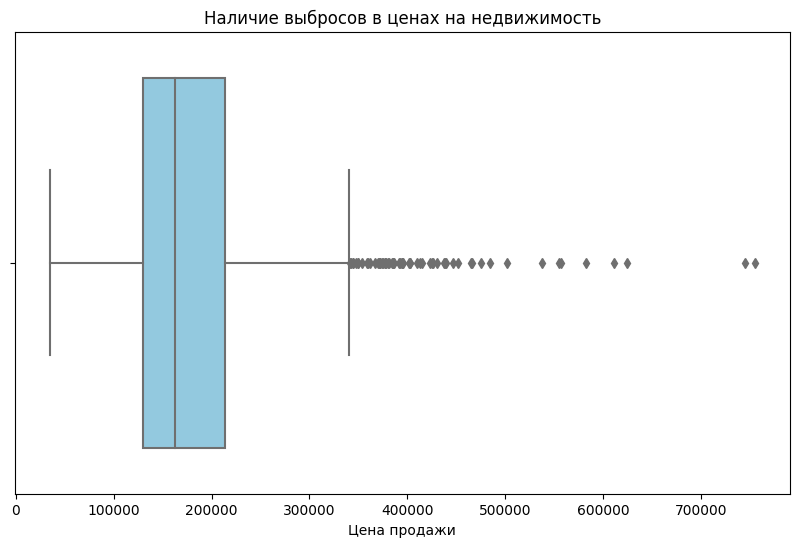

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SalePrice'], color='skyblue')
plt.title('Наличие выбросов в ценах на недвижимость')
plt.xlabel('Цена продажи')
plt.show()

В: Исследование взаимосвязей между целевой переменной и другими характеристиками:

Построим матрицу корреляции

C:\Users\User\AppData\Local\Temp\ipykernel_1556\16663315.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


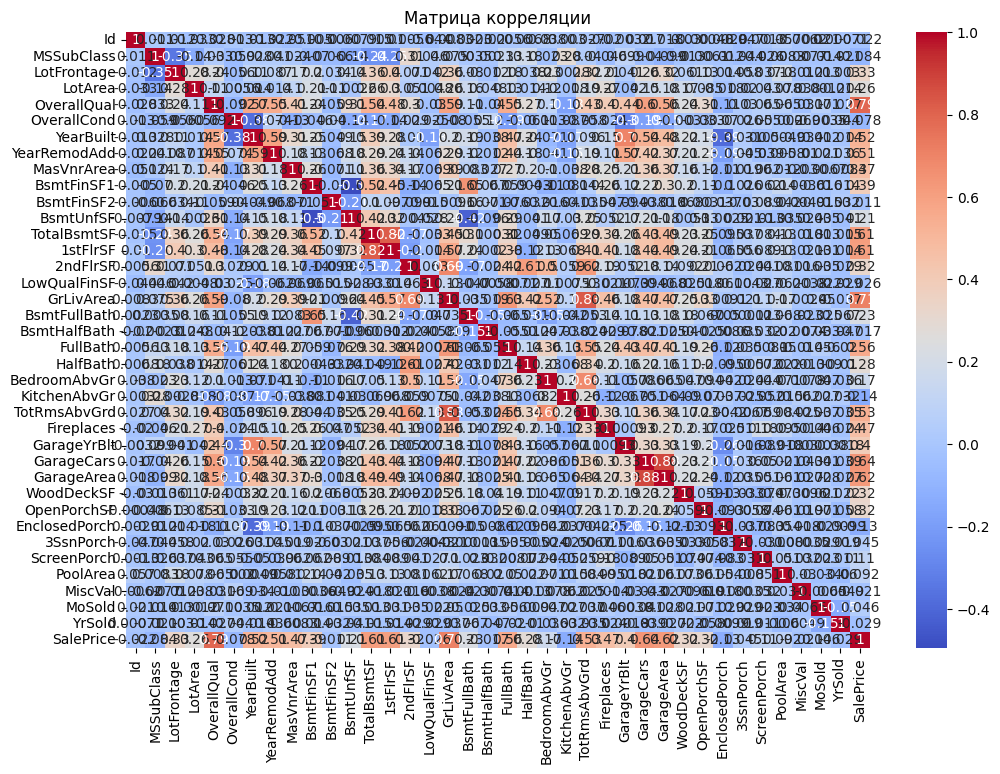

In [31]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

С: Исследование распределения и взаимосвязей других важных характеристик

Построим диаграмму рассеяния для 'OverallQual' и 'SalePrice'

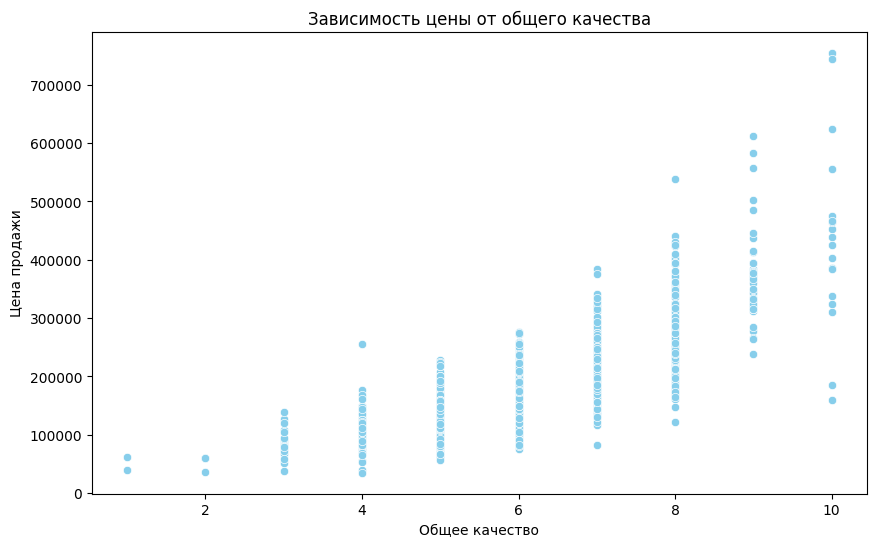

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='OverallQual', y='SalePrice', data=df, color='skyblue')
plt.title('Зависимость цены от общего качества')
plt.xlabel('Общее качество')
plt.ylabel('Цена продажи')
plt.show()

Построим диаграмму рассеяния для 'GrLivArea' и 'SalePrice'

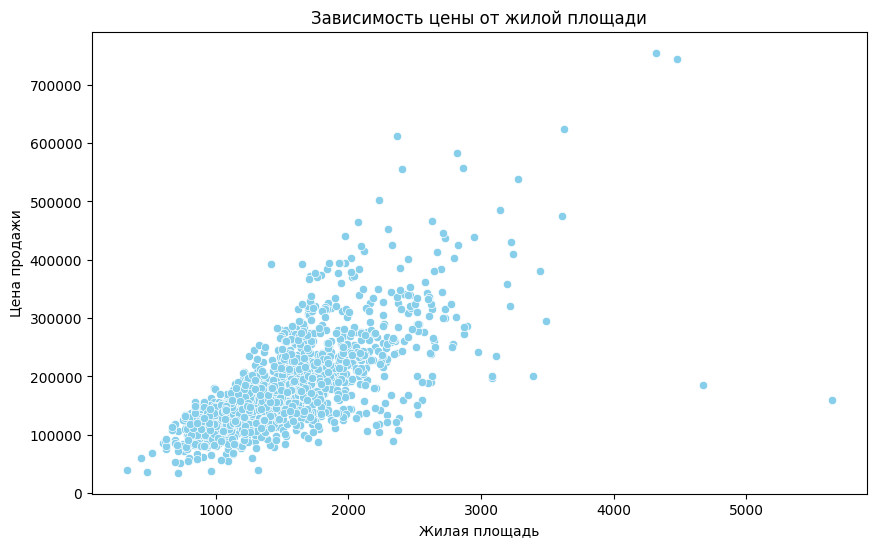

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, color='skyblue')
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена продажи')
plt.show()

Построим диаграмму рассеяния для 'GarageCars' и 'SalePrice'

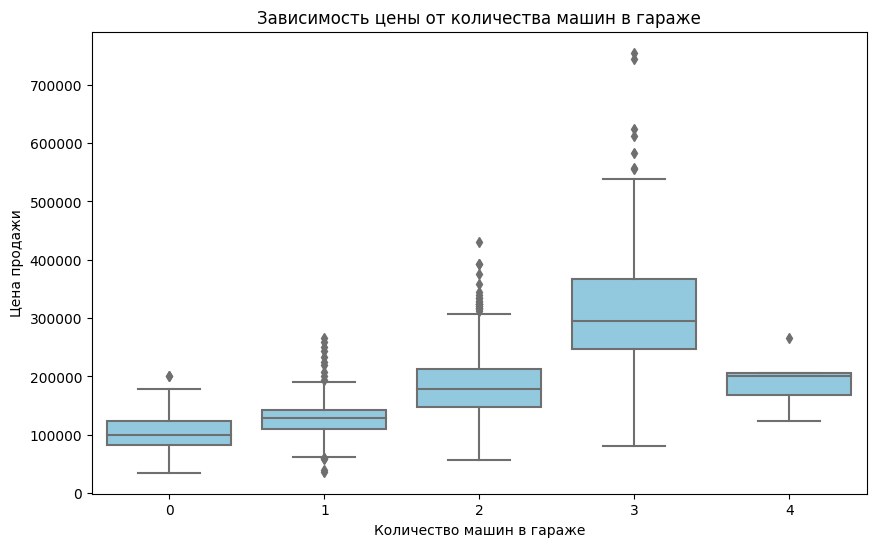

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GarageCars', y='SalePrice', data=df, color='skyblue')
plt.title('Зависимость цены от количества машин в гараже')
plt.xlabel('Количество машин в гараже')
plt.ylabel('Цена продажи')
plt.show()

А: Работа с категориальными переменными

In [35]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [36]:
categorical_features = ['Neighborhood', 'Exterior1st', 'Exterior2nd']
one_hot_encoded = pd.get_dummies(df[categorical_features])

In [37]:
label_encoder = LabelEncoder()
df['OverallQual_encoded'] = label_encoder.fit_transform(df['OverallQual'])

В:  Создание новых характеристик
Общая площадь
возраст объекта недвижимости

In [38]:
df['TotalArea'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [39]:
df['AgeAtSale'] = df['YrSold'] - df['YearBuilt']

In [40]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallQual_encoded,TotalArea,AgeAtSale
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,Shed,0,2,2008,WD,Normal,208500,6,2566,5
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,Shed,0,5,2007,WD,Normal,181500,5,2524,31
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,Shed,0,9,2008,WD,Normal,223500,6,2706,7
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,Shed,0,2,2006,WD,Abnorml,140000,6,2473,91
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,Shed,0,12,2008,WD,Normal,250000,7,3343,8


Сохранение данных

In [41]:
output_file_name = 'cleaned_house_prices.csv'
df.to_csv(output_file_name, index=False)
print(f"Файл '{output_file_name}' успешно сохранен в текущей папке.")

Файл 'cleaned_house_prices.csv' успешно сохранен в текущей папке.
